<a href="https://colab.research.google.com/github/SiqiHuang18/ECE239as-Deep-learning/blob/ChrisZhang/RNN_CNN_testsubjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
from load_data import *
from RNN_CNN import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
train_loader, test_loader, val_loader, _ = loader()(subject = 1,
                                             batch_size= 30,
                                             num_validation =37)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)


In [0]:
criteria = F.cross_entropy

def train(epoch, device):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(test_loader=test_loader, mode = 'val', device = None):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device).long()
            output = model(data)
            test_loss += criteria(output, target, reduction='sum').item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().sum().item()
        
    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [0]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    device = torch.device("cuda")

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch,device)
        stats['train'].append(test(train_loader, mode='train',device = device))
        stats['val'].append(test(val_loader, mode='val',device = device))

    print('Test set result:')
    test(test_loader, mode = 'val',device=device)

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.356301
Train Epoch: 0 [150/199 (71%)]	Loss: 1.346787
train loss: 1.2418, Accuracy: 94/199 (47%)
validation loss: 1.2760, Accuracy: 17/38 (45%)

Train Epoch: 1 [0/199 (0%)]	Loss: 1.166258
Train Epoch: 1 [150/199 (71%)]	Loss: 1.221552
train loss: 1.1211, Accuracy: 103/199 (52%)
validation loss: 1.2128, Accuracy: 16/38 (42%)

Train Epoch: 2 [0/199 (0%)]	Loss: 1.187078
Train Epoch: 2 [150/199 (71%)]	Loss: 1.115985
train loss: 1.0262, Accuracy: 116/199 (58%)
validation loss: 1.2250, Accuracy: 17/38 (45%)

Train Epoch: 3 [0/199 (0%)]	Loss: 1.130595
Train Epoch: 3 [150/199 (71%)]	Loss: 0.921377
train loss: 0.8879, Accuracy: 134/199 (67%)
validation loss: 1.2677, Accuracy: 16/38 (42%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.878992
Train Epoch: 4 [150/199 (71%)]	Loss: 0.96

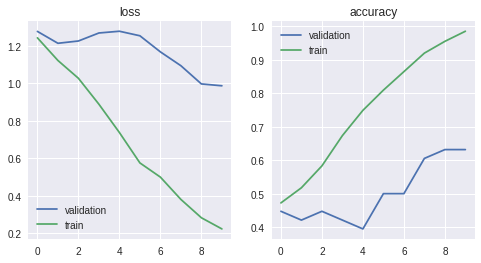

In [46]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 1,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.441254
Train Epoch: 0 [150/198 (71%)]	Loss: 1.341169
train loss: 1.2306, Accuracy: 108/198 (55%)
validation loss: 1.3062, Accuracy: 17/38 (45%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.246510
Train Epoch: 1 [150/198 (71%)]	Loss: 0.964865
train loss: 1.0345, Accuracy: 113/198 (57%)
validation loss: 1.2760, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.099347
Train Epoch: 2 [150/198 (71%)]	Loss: 0.903966
train loss: 0.9055, Accuracy: 127/198 (64%)
validation loss: 1.2782, Accuracy: 19/38 (50%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.747514
Train Epoch: 3 [150/198 (71%)]	Loss: 0.737079
train loss: 0.8027, Accuracy: 143/198 (72%)
validation loss: 1.2817, Accuracy: 17/38 (45%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.772893
Train Epoch: 4 [150/198 (71%)]	Loss: 0.7

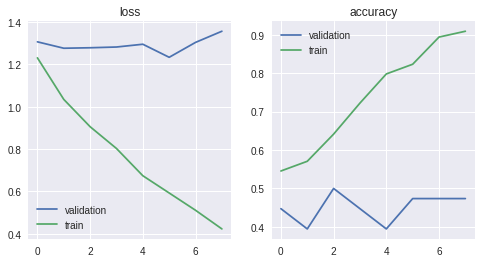

In [47]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 2,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.379609
Train Epoch: 0 [150/198 (71%)]	Loss: 1.297582
train loss: 1.2977, Accuracy: 108/198 (55%)
validation loss: 1.3681, Accuracy: 12/38 (32%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.073638
Train Epoch: 1 [150/198 (71%)]	Loss: 1.055897
train loss: 1.0468, Accuracy: 129/198 (65%)
validation loss: 1.2460, Accuracy: 16/38 (42%)

Train Epoch: 2 [0/198 (0%)]	Loss: 0.979301
Train Epoch: 2 [150/198 (71%)]	Loss: 0.775864
train loss: 0.7676, Accuracy: 147/198 (74%)
validation loss: 1.1320, Accuracy: 16/38 (42%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.682976
Train Epoch: 3 [150/198 (71%)]	Loss: 0.649036
train loss: 0.6196, Accuracy: 158/198 (80%)
validation loss: 1.0859, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.466793
Train Epoch: 4 [150/198 (71%)]	Loss: 0.4

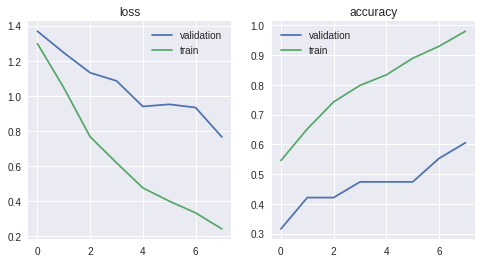

In [48]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 3,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (196, 22, 1000)
Train labels shape:  (196,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/196 (0%)]	Loss: 1.347100
Train Epoch: 0 [150/196 (71%)]	Loss: 1.296021
train loss: 1.2345, Accuracy: 107/196 (55%)
validation loss: 1.3369, Accuracy: 11/38 (29%)

Train Epoch: 1 [0/196 (0%)]	Loss: 1.189786
Train Epoch: 1 [150/196 (71%)]	Loss: 1.077183
train loss: 1.0455, Accuracy: 115/196 (59%)
validation loss: 1.2355, Accuracy: 14/38 (37%)

Train Epoch: 2 [0/196 (0%)]	Loss: 0.879677
Train Epoch: 2 [150/196 (71%)]	Loss: 0.765474
train loss: 0.8873, Accuracy: 139/196 (71%)
validation loss: 1.1347, Accuracy: 17/38 (45%)

Train Epoch: 3 [0/196 (0%)]	Loss: 0.851462
Train Epoch: 3 [150/196 (71%)]	Loss: 1.119899
train loss: 0.7688, Accuracy: 144/196 (73%)
validation loss: 1.1420, Accuracy: 17/38 (45%)

Train Epoch: 4 [0/196 (0%)]	Loss: 0.679593
Train Epoch: 4 [150/196 (71%)]	Loss: 0.8

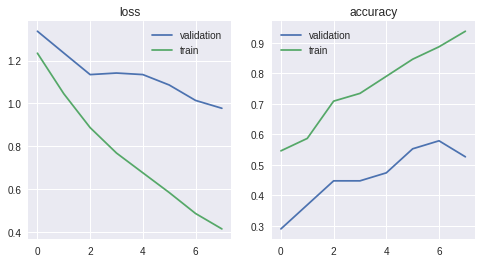

In [49]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 4,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/197 (0%)]	Loss: 1.389605
Train Epoch: 0 [150/197 (71%)]	Loss: 1.261079
train loss: 1.2456, Accuracy: 113/197 (57%)
validation loss: 1.3100, Accuracy: 16/38 (42%)

Train Epoch: 1 [0/197 (0%)]	Loss: 1.057820
Train Epoch: 1 [150/197 (71%)]	Loss: 0.990311
train loss: 0.9401, Accuracy: 143/197 (73%)
validation loss: 1.2173, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/197 (0%)]	Loss: 0.848604
Train Epoch: 2 [150/197 (71%)]	Loss: 0.876827
train loss: 0.6943, Accuracy: 154/197 (78%)
validation loss: 1.1000, Accuracy: 21/38 (55%)

Train Epoch: 3 [0/197 (0%)]	Loss: 0.763083
Train Epoch: 3 [150/197 (71%)]	Loss: 0.576695
train loss: 0.5235, Accuracy: 167/197 (85%)
validation loss: 0.9940, Accuracy: 24/38 (63%)

Train Epoch: 4 [0/197 (0%)]	Loss: 0.535569
Train Epoch: 4 [150/197 (71%)]	Loss: 0.5

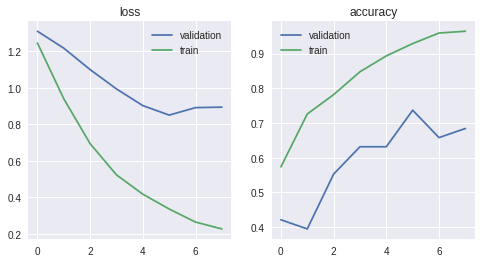

In [50]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 5,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (49, 22, 1000)
test labels shape:  (49,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.377144
Train Epoch: 0 [150/198 (71%)]	Loss: 1.311802
train loss: 1.2924, Accuracy: 110/198 (56%)
validation loss: 1.3376, Accuracy: 17/38 (45%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.156663
Train Epoch: 1 [150/198 (71%)]	Loss: 1.195304
train loss: 1.1078, Accuracy: 125/198 (63%)
validation loss: 1.2621, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.281948
Train Epoch: 2 [150/198 (71%)]	Loss: 0.883066
train loss: 0.9386, Accuracy: 137/198 (69%)
validation loss: 1.1690, Accuracy: 16/38 (42%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.947408
Train Epoch: 3 [150/198 (71%)]	Loss: 0.868124
train loss: 0.8062, Accuracy: 146/198 (74%)
validation loss: 1.1256, Accuracy: 17/38 (45%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.821266
Train Epoch: 4 [150/198 (71%)]	Loss: 0.8

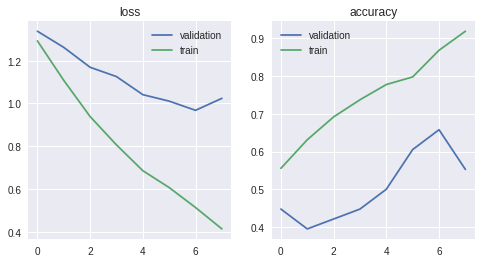

In [51]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 6,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/200 (0%)]	Loss: 1.395239
Train Epoch: 0 [150/200 (71%)]	Loss: 1.259906
train loss: 1.1650, Accuracy: 131/200 (66%)
validation loss: 1.2278, Accuracy: 24/38 (63%)

Train Epoch: 1 [0/200 (0%)]	Loss: 1.016212
Train Epoch: 1 [150/200 (71%)]	Loss: 0.784859
train loss: 0.7915, Accuracy: 151/200 (76%)
validation loss: 0.9476, Accuracy: 29/38 (76%)

Train Epoch: 2 [0/200 (0%)]	Loss: 0.639096
Train Epoch: 2 [150/200 (71%)]	Loss: 0.581856
train loss: 0.5325, Accuracy: 170/200 (85%)
validation loss: 0.7481, Accuracy: 29/38 (76%)

Train Epoch: 3 [0/200 (0%)]	Loss: 0.617905
Train Epoch: 3 [150/200 (71%)]	Loss: 0.518685
train loss: 0.4080, Accuracy: 172/200 (86%)
validation loss: 0.6940, Accuracy: 27/38 (71%)

Train Epoch: 4 [0/200 (0%)]	Loss: 0.340645
Train Epoch: 4 [150/200 (71%)]	Loss: 0.3

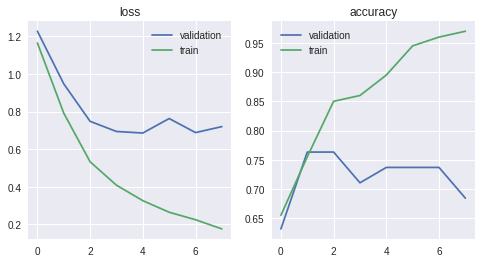

In [52]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 7,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/194 (0%)]	Loss: 1.410784
Train Epoch: 0 [150/194 (71%)]	Loss: 1.373067
train loss: 1.2737, Accuracy: 114/194 (59%)
validation loss: 1.3470, Accuracy: 12/38 (32%)

Train Epoch: 1 [0/194 (0%)]	Loss: 1.201811
Train Epoch: 1 [150/194 (71%)]	Loss: 1.188767
train loss: 1.0159, Accuracy: 131/194 (68%)
validation loss: 1.2482, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/194 (0%)]	Loss: 0.852045
Train Epoch: 2 [150/194 (71%)]	Loss: 0.884464
train loss: 0.8093, Accuracy: 135/194 (70%)
validation loss: 1.2457, Accuracy: 13/38 (34%)

Train Epoch: 3 [0/194 (0%)]	Loss: 0.854823
Train Epoch: 3 [150/194 (71%)]	Loss: 0.779094
train loss: 0.6513, Accuracy: 157/194 (81%)
validation loss: 1.2052, Accuracy: 21/38 (55%)

Train Epoch: 4 [0/194 (0%)]	Loss: 0.579224
Train Epoch: 4 [150/194 (71%)]	Loss: 0.6

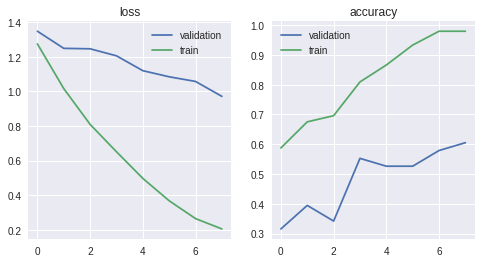

In [53]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 8,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (193, 22, 1000)
Train labels shape:  (193,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/193 (0%)]	Loss: 1.371778
Train Epoch: 0 [150/193 (71%)]	Loss: 1.376584
train loss: 1.3036, Accuracy: 110/193 (57%)
validation loss: 1.3351, Accuracy: 16/38 (42%)

Train Epoch: 1 [0/193 (0%)]	Loss: 1.237129
Train Epoch: 1 [150/193 (71%)]	Loss: 1.066254
train loss: 1.0673, Accuracy: 131/193 (68%)
validation loss: 1.2003, Accuracy: 19/38 (50%)

Train Epoch: 2 [0/193 (0%)]	Loss: 0.969702
Train Epoch: 2 [150/193 (71%)]	Loss: 0.979588
train loss: 0.8550, Accuracy: 134/193 (69%)
validation loss: 1.0841, Accuracy: 21/38 (55%)

Train Epoch: 3 [0/193 (0%)]	Loss: 0.809032
Train Epoch: 3 [150/193 (71%)]	Loss: 0.608307
train loss: 0.6992, Accuracy: 143/193 (74%)
validation loss: 1.0265, Accuracy: 20/38 (53%)

Train Epoch: 4 [0/193 (0%)]	Loss: 0.870514
Train Epoch: 4 [150/193 (71%)]	Loss: 0.6

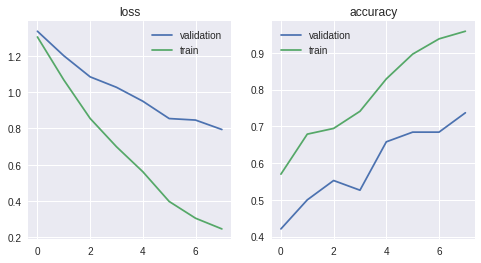

In [54]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 9,
                                             batch_size= 30,
                                             num_validation =38)
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (1782, 22, 1000)
Train labels shape:  (1782,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (333, 22, 1000)
Validation labels shape:  (333,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
Train Epoch: 0 [0/1782 (0%)]	Loss: 1.378680
Train Epoch: 0 [150/1782 (8%)]	Loss: 1.359390
Train Epoch: 0 [300/1782 (17%)]	Loss: 1.304948
Train Epoch: 0 [450/1782 (25%)]	Loss: 1.261662
Train Epoch: 0 [600/1782 (33%)]	Loss: 1.287405
Train Epoch: 0 [750/1782 (42%)]	Loss: 1.325802
Train Epoch: 0 [900/1782 (50%)]	Loss: 1.348599
Train Epoch: 0 [1050/1782 (58%)]	Loss: 1.328151
Train Epoch: 0 [1200/1782 (67%)]	Loss: 1.111084
Train Epoch: 0 [1350/1782 (75%)]	Loss: 1.263108
Train Epoch: 0 [1500/1782 (83%)]	Loss: 1.249509
Train Epoch: 0 [1650/1782 (92%)]	Loss: 1.047876
train loss: 1.0890, Accuracy: 968/1782 (54%)
validation loss: 1.1678, Accuracy: 173/333 (52%)

Train Epoch: 1 [0/1782 (0%)]	Loss: 1.040565
Train Epoch: 1 [150/1782 (8%)]	Loss

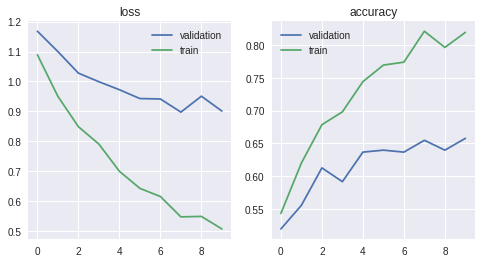

In [55]:
train_loader, test_loader, val_loader, test_loaders = loader()(subject = "ALL",
                                                            batch_size = 30,
                                                            num_validation = 37)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    break
model = RNN0_CNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(test_loaders[i], mode = 'val',device=device)